# ALY 6140: Traffic Accident Analysis Using Machine Learning
# (Analyzing Patterns, Anomaly Detection and Crash Severity Prediction)
# Submitted by: Casey Anetor

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [4]:
# Load the dataset
df = pd.read_csv('Traffic_accidents dataset.csv')

# Step 1: Remove Duplicate Rows 
df_cleaned = df.drop_duplicates()

# Step 2: Convert crash_date to datetime format
df_cleaned.loc[:, 'crash_date'] = pd.to_datetime(df_cleaned['crash_date'], errors='coerce')

# Step 3: Convert categorical columns to category type 
categorical_columns = [
    'traffic_control_device', 'weather_condition', 'lighting_condition',
    'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond',
    'road_defect', 'crash_type', 'intersection_related_i', 'damage',
    'prim_contributory_cause', 'most_severe_injury'
]
df_cleaned.loc[:, categorical_columns] = df_cleaned[categorical_columns].apply(lambda x: x.str.strip().str.lower())



In [8]:
# Ensures df_cleaned is a separate DataFrame
df_cleaned = df_cleaned.copy() 

import pandas as pd

# Step 1: Ensure a copy of the dataframe is created
df_cleaned = df_cleaned.copy()

# Step 2: Check if 'crash_date' column exists
if 'crash_date' in df_cleaned.columns:

    # Step 3: Convert 'crash_date' to string and strip spaces
    df_cleaned['crash_date'] = df_cleaned['crash_date'].astype(str).str.strip()

    # Step 4: Convert to datetime format, handling errors
    df_cleaned['crash_date'] = pd.to_datetime(df_cleaned['crash_date'], errors='coerce')

    # Step 5: Verify conversion
    print("Column Type After Conversion:", df_cleaned['crash_date'].dtype)
    print("Missing Values in 'crash_date':", df_cleaned['crash_date'].isna().sum())

    # Step 6: Extract year from crash_date (only if conversion was successful)
    if df_cleaned['crash_date'].dtype == 'datetime64[ns]':
        df_cleaned['crash_year'] = df_cleaned['crash_date'].dt.year
        print(df_cleaned[['crash_date', 'crash_year']].head())  # Verify results
    else:
        print("🚨 Conversion to datetime failed. Please check the data format.")

else:
    print("🚨 'crash_date' column not found in DataFrame!")

# Step 7: Check unique values in 'crash_date' for debugging
print("Unique values in 'crash_date':", df_cleaned['crash_date'].unique()[:20])



Column Type After Conversion: datetime64[ns]
Missing Values in 'crash_date': 0
           crash_date  crash_year
0 2023-07-29 13:00:00        2023
1 2023-08-13 00:11:00        2023
2 2021-12-09 10:30:00        2021
3 2023-08-09 19:55:00        2023
4 2023-08-19 14:55:00        2023
Unique values in 'crash_date': <DatetimeArray>
['2023-07-29 13:00:00', '2023-08-13 00:11:00', '2021-12-09 10:30:00',
 '2023-08-09 19:55:00', '2023-08-19 14:55:00', '2023-09-06 00:59:00',
 '2022-12-20 11:45:00', '2023-09-20 14:38:00', '2018-06-04 18:42:00',
 '2023-09-07 17:30:00', '2023-09-07 20:32:00', '2016-11-02 16:49:00',
 '2020-07-02 17:45:00', '2023-08-09 07:00:00', '2020-02-09 14:00:00',
 '2023-08-01 23:45:00', '2023-08-01 15:29:00', '2023-09-05 19:05:00',
 '2022-09-09 16:53:00', '2023-08-15 18:50:00']
Length: 20, dtype: datetime64[ns]


In [10]:
# Save cleaned dataset
cleaned_file_path = "Traffic_accidents_cleaned.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Data cleaning complete! The cleaned dataset is saved as '{cleaned_file_path}'.")

Data cleaning complete! The cleaned dataset is saved as 'Traffic_accidents_cleaned.csv'.


In [12]:
# Set style for better visuals
sns.set_style("whitegrid")

print(df.columns)


Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')


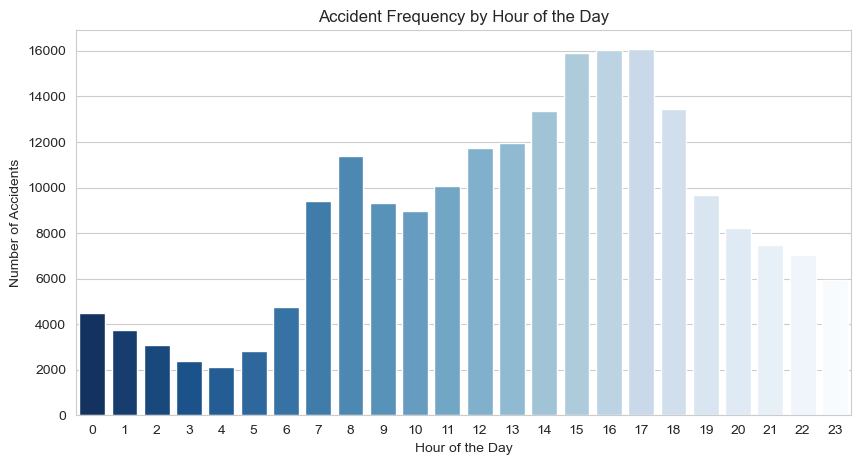

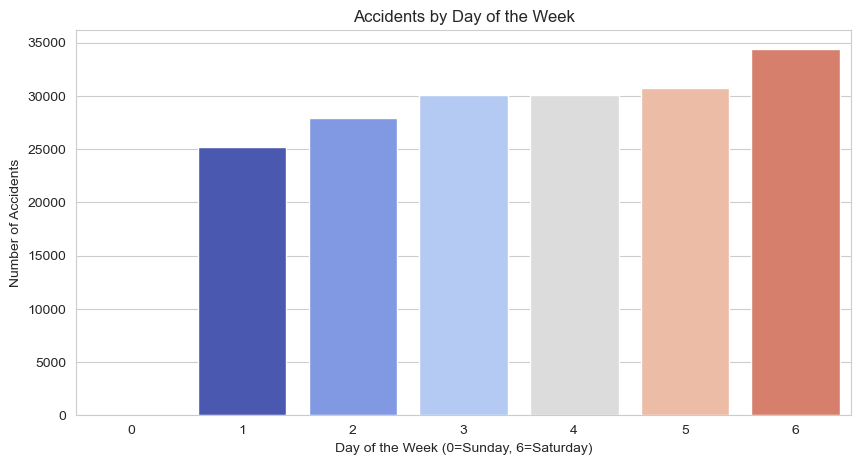

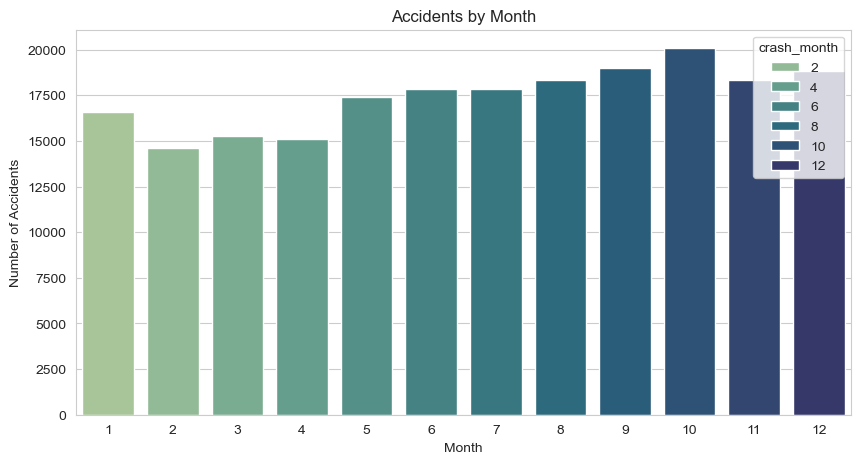

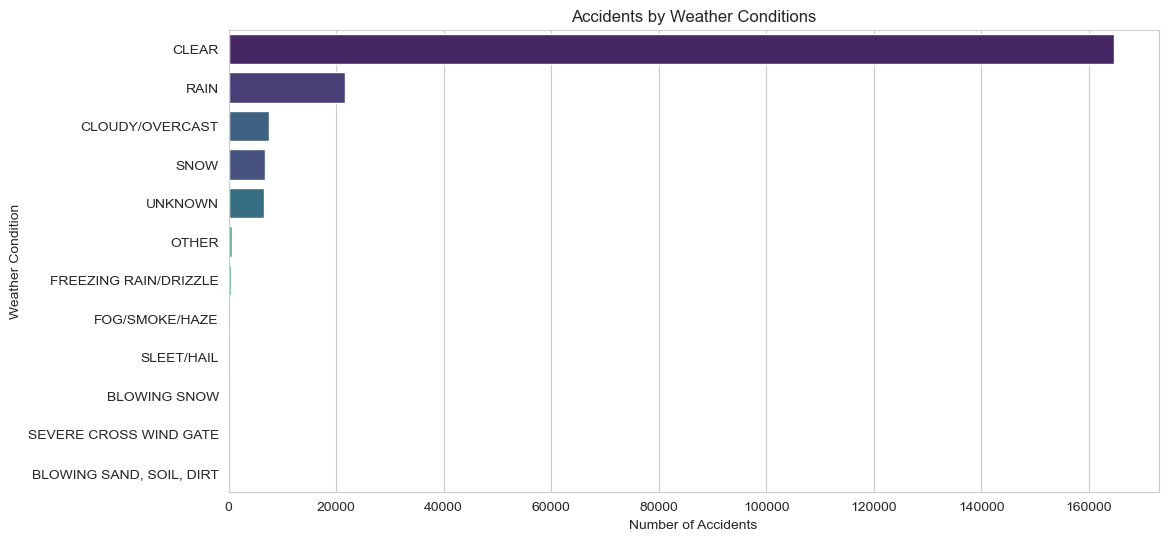

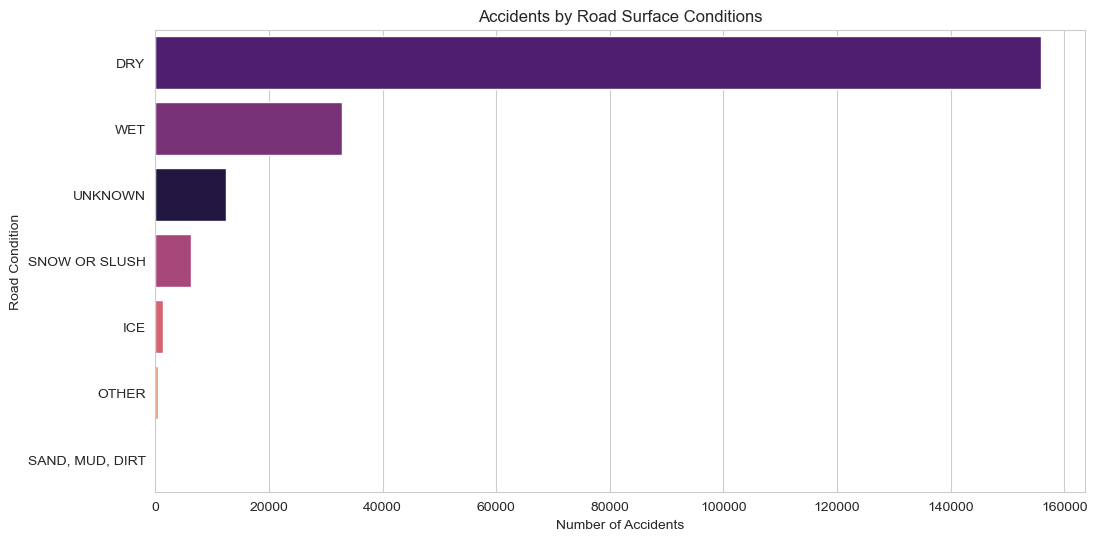

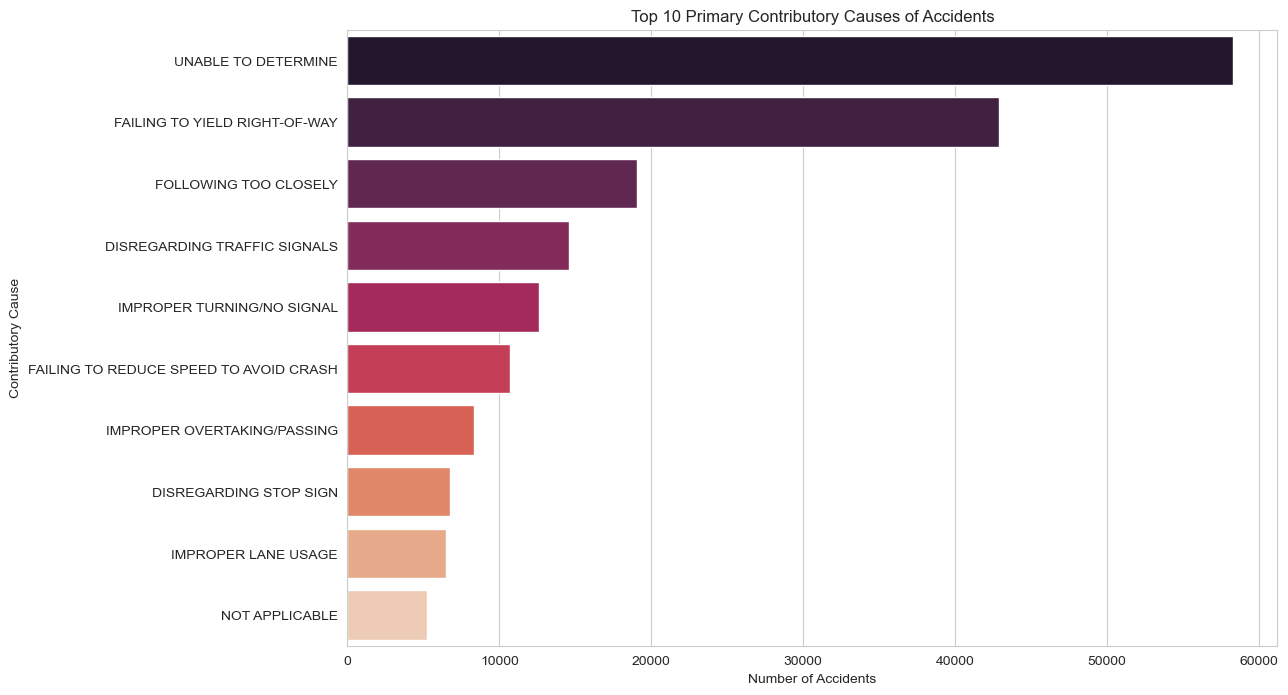

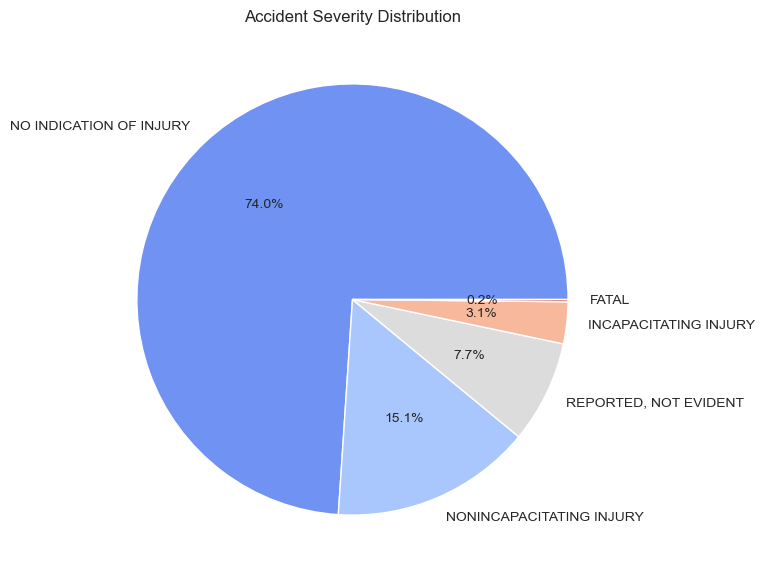

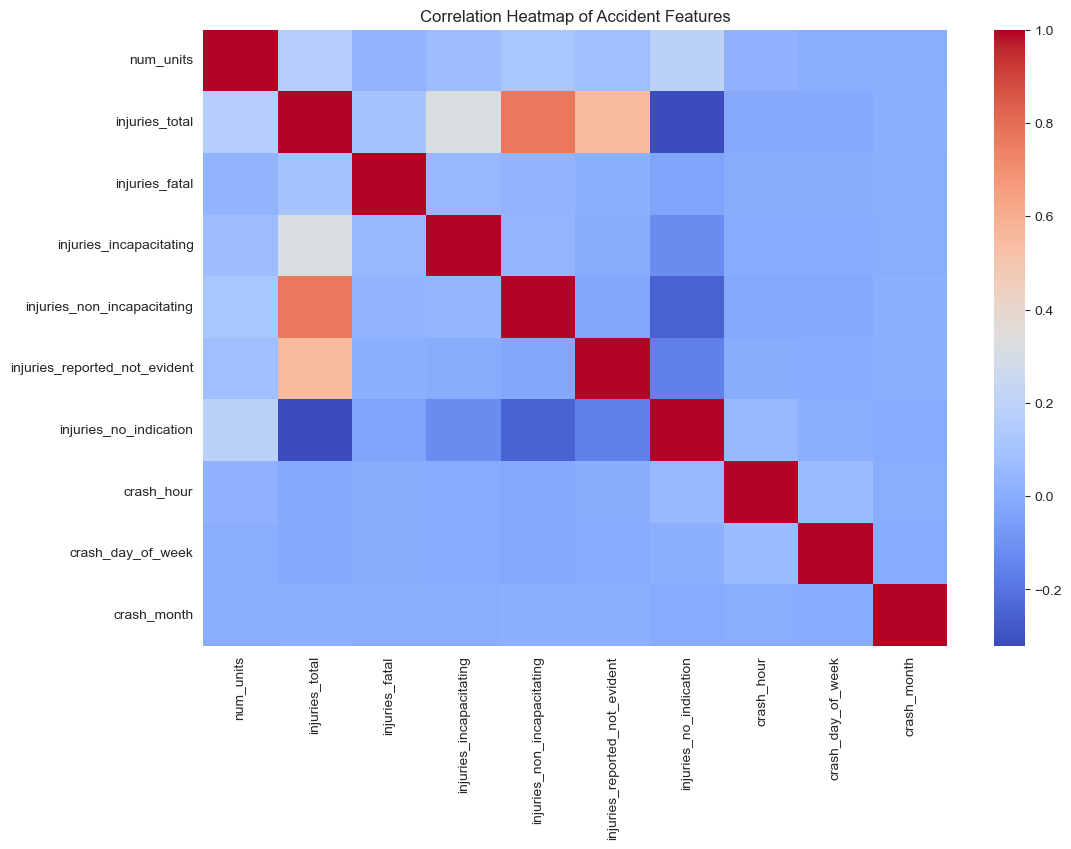

In [14]:
# 1️⃣ Accident Frequency by Hour of the Day
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='crash_hour', hue='crash_hour', palette="Blues_r", legend=False)
plt.title("Accident Frequency by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.show()

# 2️⃣ Accidents by Day of the Week
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='crash_day_of_week', hue='crash_day_of_week', order=[0,1,2,3,4,5,6], palette="coolwarm", legend=False)
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of the Week (0=Sunday, 6=Saturday)")
plt.ylabel("Number of Accidents")
plt.show()

# 3️⃣ Accidents by Month
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='crash_month', hue='crash_month', palette="crest")
plt.title("Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.show()

# 4️⃣ Accidents by Weather Conditions
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='weather_condition', hue='weather_condition', order=df['weather_condition'].value_counts().index, palette="viridis", legend=False)
plt.title("Accidents by Weather Conditions")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()

# 5️⃣ Accidents by Road Surface Conditions
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='roadway_surface_cond', hue='roadway_surface_cond', order=df['roadway_surface_cond'].value_counts().index, palette="magma", legend=False)
plt.title("Accidents by Road Surface Conditions")
plt.xlabel("Number of Accidents")
plt.ylabel("Road Condition")
plt.show()

# 6️⃣ Primary Contributory Causes
top_causes = df['prim_contributory_cause'].value_counts().reset_index().head(10)
top_causes.columns = ['Contributory Cause', 'Count']  # Rename columns

plt.figure(figsize=(12,8))
sns.barplot(data=top_causes, y='Contributory Cause', hue='Contributory Cause', x='Count', palette="rocket", legend=False)
plt.title("Top 10 Primary Contributory Causes of Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Contributory Cause")
plt.show()

# 7️⃣ Accident Severity Distribution (Pie Chart)
plt.figure(figsize=(7,7))
df['most_severe_injury'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(df['most_severe_injury'].unique())))
plt.title("Accident Severity Distribution")
plt.ylabel("")
plt.show()

# 8️⃣ Heatmap of Feature Correlations
# Select only numerical columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Generate correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Accident Features")
plt.show()



# Descrptive, Trend and Correlation Analysis

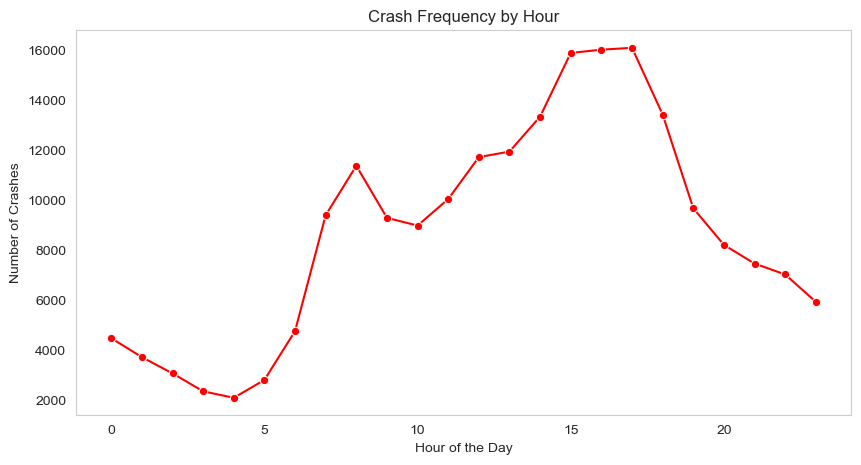

<Figure size 1200x600 with 0 Axes>

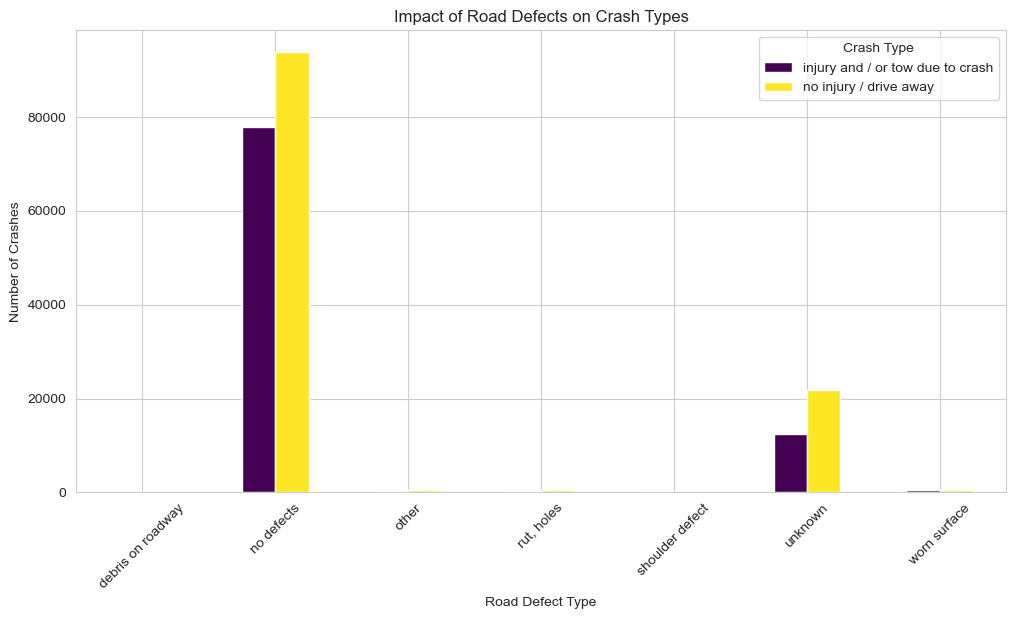

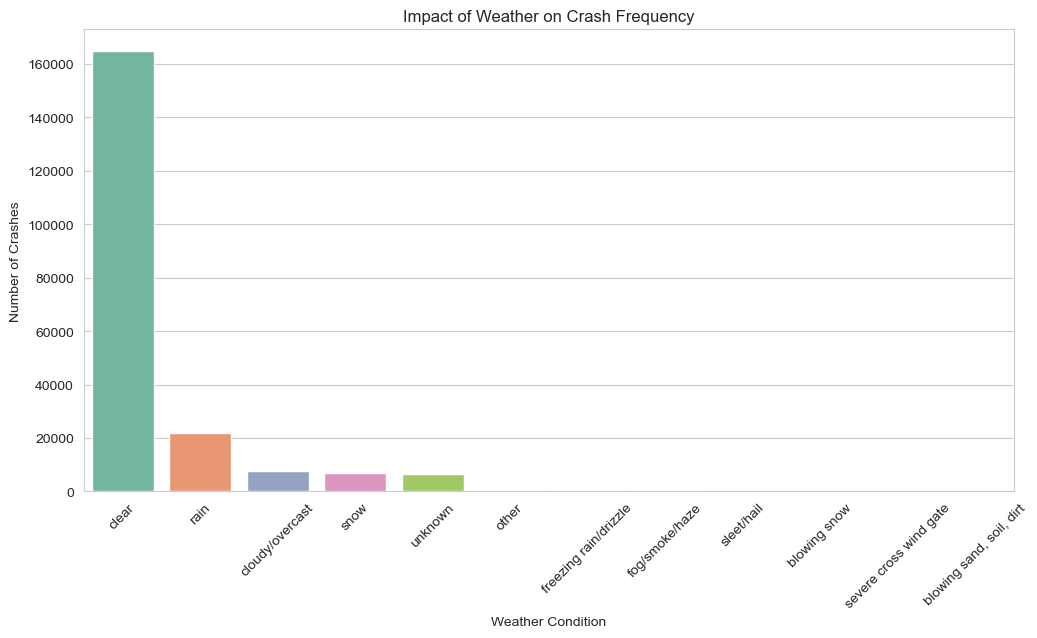

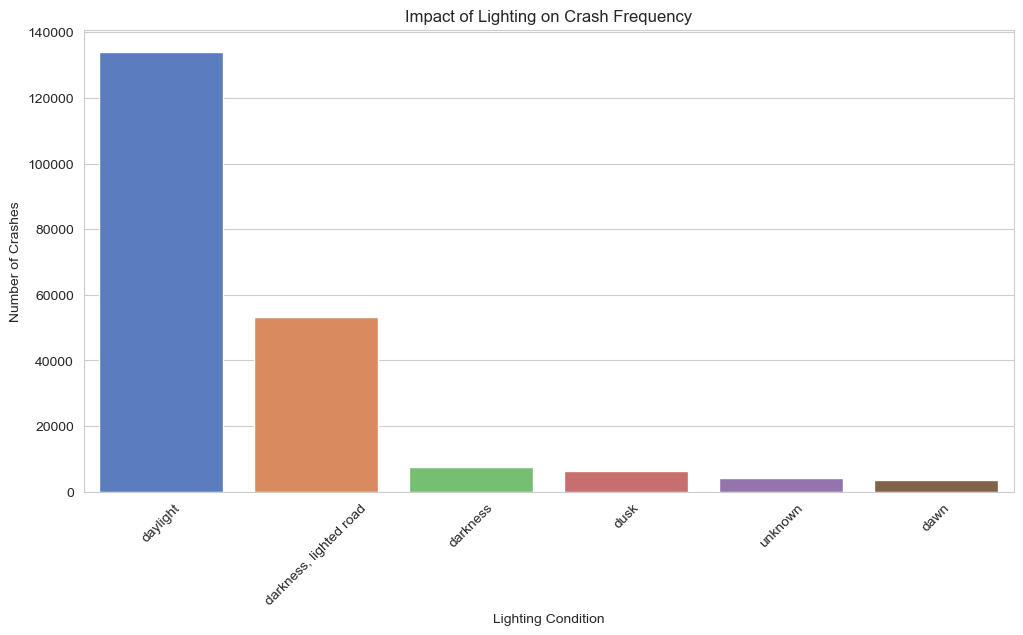

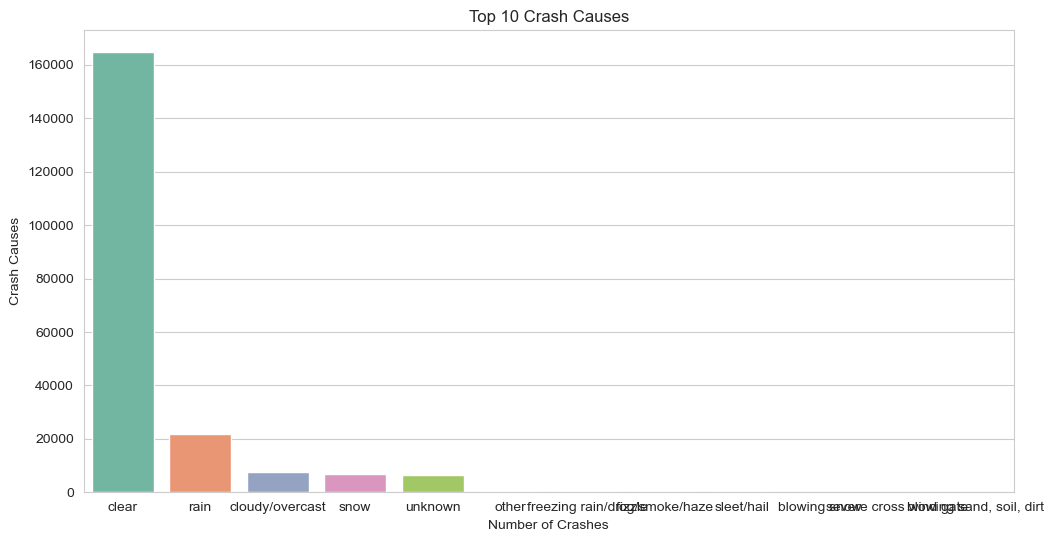

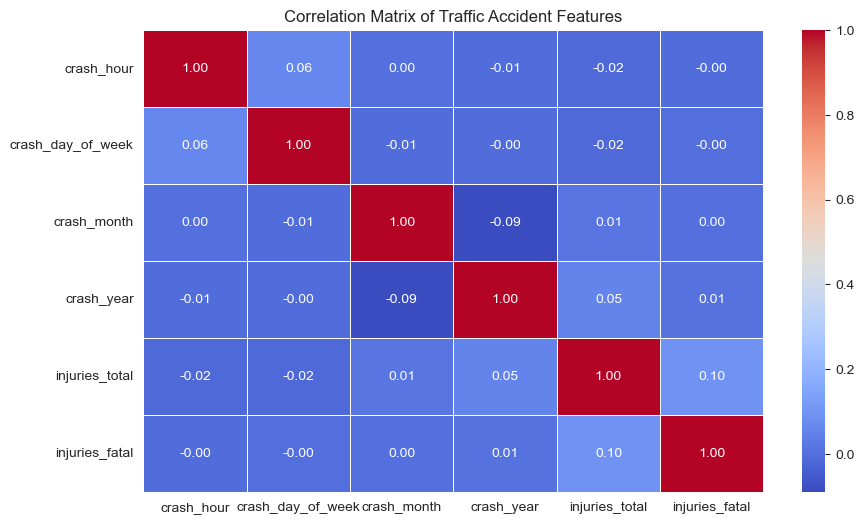

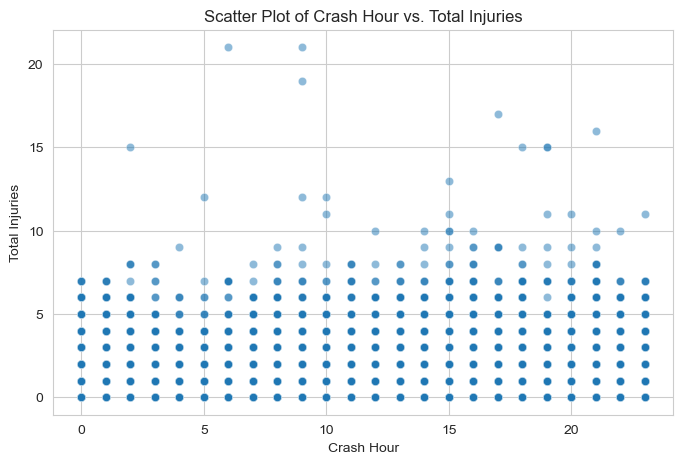

In [69]:
import matplotlib.pyplot as plot
import seaborn as sns

# Count crashes by hour
crash_by_hour = df['crash_hour'].value_counts().sort_index()
plot.figure(figsize=(10,5))
sns.lineplot(x=crash_by_hour.index, y=crash_by_hour.values, marker='o', color='red')
plot.xlabel("Hour of the Day")
plot.ylabel("Number of Crashes")
plot.title("Crash Frequency by Hour")
plot.grid()
plot.show()

# Analysis on the impact of road defect, crash typ and and damage cost 
# Bar Chart: Impact of Road Defects on Crash Types
plot.figure(figsize=(12,6))
road_defect_crash = df.groupby("road_defect")["crash_type"].value_counts().unstack().fillna(0)
road_defect_crash.plot(kind='bar', column=True, colormap='viridis', figsize=(12,6))
plot.xlabel("Road Defect Type")
plot.ylabel("Number of Crashes")
plot.title("Impact of Road Defects on Crash Types")
plot.xticks(rotation=45)
plot.legend(title="Crash Type")
plot.show()

# Weather and Lighting Impact

# Count crashes by weather condition
if 'weather_condition' in df.columns:
    weather_counts = df['weather_condition'].value_counts()

    plot.figure(figsize=(12,6))
    sns.barplot(x=weather_counts.index, 
            y=weather_counts.values, 
            hue=weather_counts.index, 
            palette="Set2", 
            legend=False)
    plot.xticks(rotation=45)
    plot.xlabel("Weather Condition")
    plot.ylabel("Number of Crashes")
    plot.title("Impact of Weather on Crash Frequency")
    plot.show()
    
# Count crashes by lighting condition
if 'lighting_condition' in df.columns:
    lighting_counts = df['lighting_condition'].value_counts()

    plot.figure(figsize=(12, 6))
    sns.barplot(x=lighting_counts.index, y=lighting_counts.values, hue=lighting_counts.index, palette="muted", legend=False)
    plot.xticks(rotation=45)
    plot.xlabel("Lighting Condition")
    plot.ylabel("Number of Crashes")
    plot.title("Impact of Lighting on Crash Frequency")
    plot.show()
    
# Crash Causes Analysis
# Identify most common crash causes
if 'prim_contributory_cause' in df.columns:
    common_causes = df['prim_contributory_cause'].value_counts().head(10)

    plot.figure(figsize=(12,6))
    sns.barplot(x=weather_counts.index, y=weather_counts.values, hue=weather_counts.index, palette="Set2", legend=False)
    plot.xlabel("Number of Crashes")
    plot.ylabel("Crash Causes")
    plot.title("Top 10 Crash Causes")
    plot.show()
    
# Correlation Analysis

# Selecting relevant numerical columns for correlation analysis
correlation_columns = ["crash_hour", "crash_day_of_week", "crash_month", "crash_year", "injuries_total", "injuries_fatal"]

# Compute the correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Plot the correlation matrix
plot.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plot.title("Correlation Matrix of Traffic Accident Features")
plot.show()

# Scatter plot for crash_hour vs. injuries_total
plot.figure(figsize=(8, 5))
sns.scatterplot(x=df["crash_hour"], y=df["injuries_total"], alpha=0.5)
plot.xlabel("Crash Hour")
plot.ylabel("Total Injuries")
plot.title("Scatter Plot of Crash Hour vs. Total Injuries")
plot.show()



# Contributory Cause Analysis

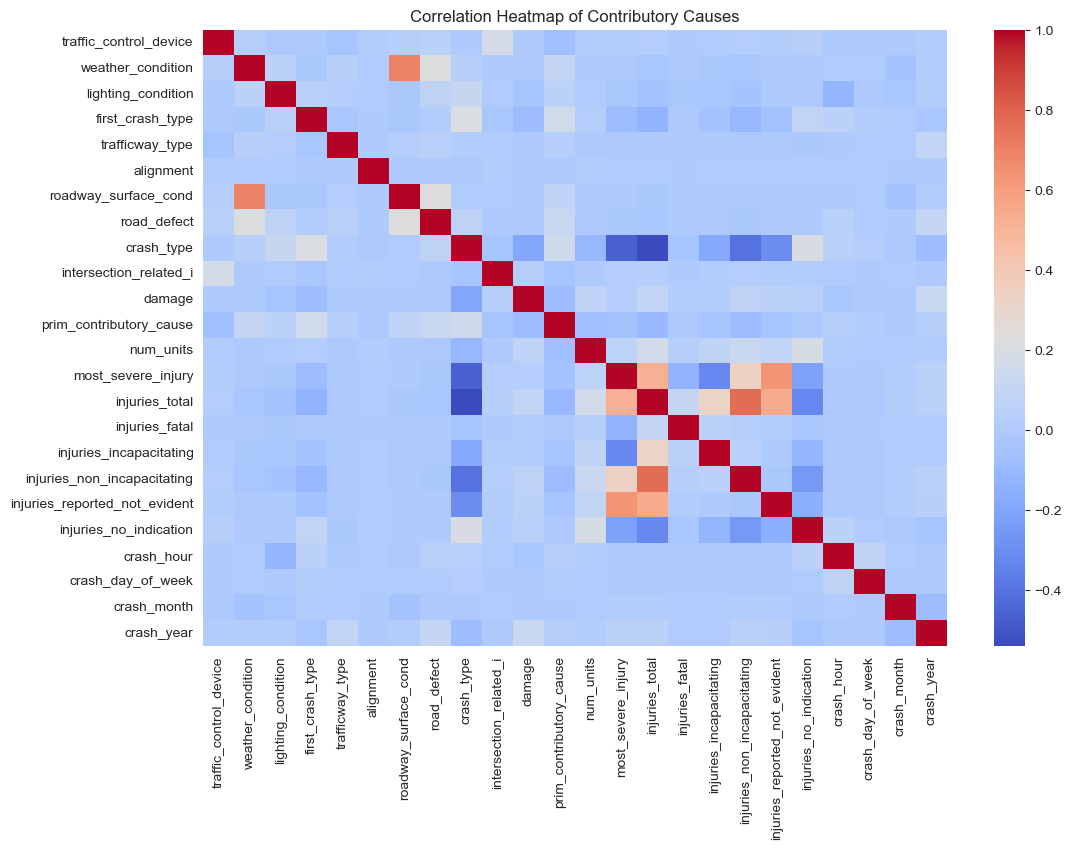

Model Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00      1372
           2       1.00      1.00      1.00     30737
           3       1.00      1.00      1.00      6419
           4       1.00      1.00      1.00      3249

    accuracy                           1.00     41855
   macro avg       1.00      1.00      1.00     41855
weighted avg       1.00      1.00      1.00     41855



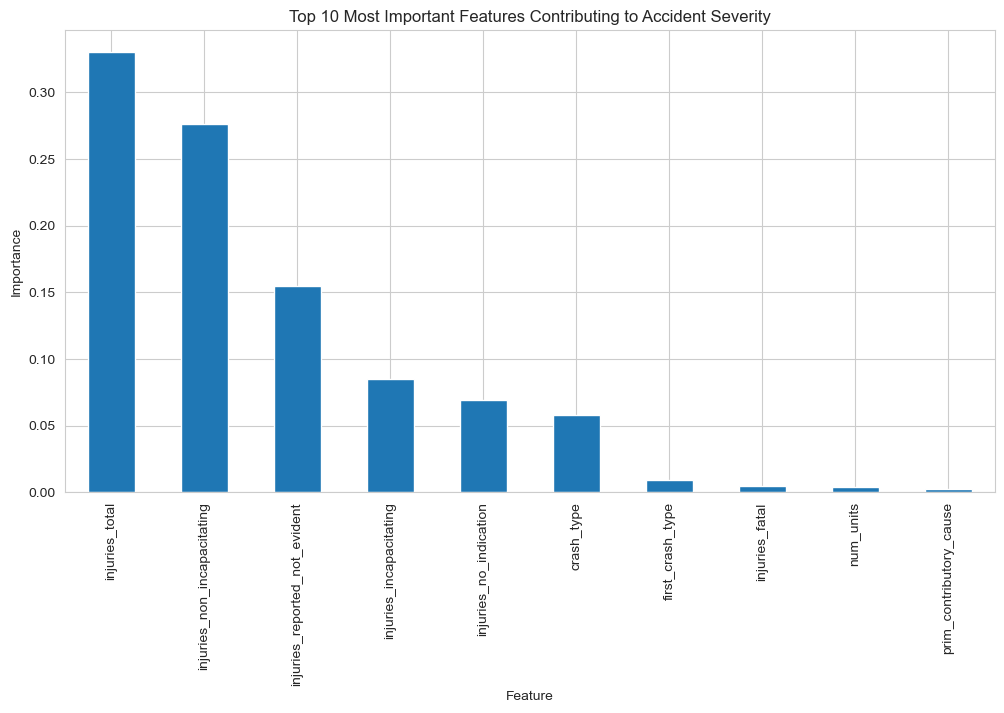

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset
df = pd.read_csv('Traffic_accidents_cleaned.csv')

# Step 1: Feature Engineering - Encoding Categorical Variables
categorical_cols = [
    'traffic_control_device', 'weather_condition', 'lighting_condition',
    'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond',
    'road_defect', 'crash_type', 'intersection_related_i', 'damage',
    'prim_contributory_cause', 'most_severe_injury'
]

for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes 

# Step 2: Correlation Heatmap (Exclude crash_date)
plt.figure(figsize=(12,8))
corr_matrix = df.drop(columns=['crash_date']).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Contributory Causes")
plt.show()

# Step 3: Data Preparation for Modeling
X = df.drop(columns=['most_severe_injury', 'crash_date'])  # Predicting severity
y = df['most_severe_injury']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 5: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Insights - Identify Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
feature_importance[:10].plot(kind='bar')
plt.title("Top 10 Most Important Features Contributing to Accident Severity")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()



# Crash Severity Prediction - Decision Tree Model

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Create a copy of the dataset for machine learning analysis
df_ml = df_cleaned.copy()  # Keeps the original df_cleaned intact

# 🔹 Drop the unnecessary column (crash_date) in the ML copy
df_ml.drop(columns=['crash_date'], inplace=True, errors='ignore')

# Specify the target column
target_column = "most_severe_injury"

# Select categorical columns, excluding the target column
categorical_cols = df_ml.select_dtypes(include=['object']).columns.drop(target_column, errors='ignore')

# Initialize the OneHotEncoder (drop the first column to avoid multicollinearity)
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Apply OneHotEncoder to the categorical columns
categorical_encoded = encoder.fit_transform(df_ml[categorical_cols])

# Convert the encoded categorical variables into a DataFrame
categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the ML dataframe
df_ml.drop(columns=categorical_cols, inplace=True)

# Concatenate the encoded columns with the original dataframe
df_ml = pd.concat([df_ml, categorical_df], axis=1)

# Identify numerical columns correctly
numerical_cols = df_ml.select_dtypes(include=['int64', 'float64']).columns

# Scale numerical features
scaler = StandardScaler()
df_ml[numerical_cols] = scaler.fit_transform(df_ml[numerical_cols])

# Split data into features and target
X = df_ml.drop(columns=[target_column])
y = df_ml[target_column]

# Encode target variable
y = y.astype('category').cat.codes  # Convert to numeric categories

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Tune hyperparameters using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters and train final model
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

# Make predictions
y_pred = best_dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Feature Importance Analysis
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': best_dt.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importances)


Model Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00         6
           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00      1313
           2       1.00      1.00      1.00     30954
           3       1.00      1.00      1.00      6304
           4       1.00      1.00      1.00      3215

    accuracy                           1.00     41862
   macro avg       1.00      1.00      1.00     41862
weighted avg       1.00      1.00      1.00     41862


Feature Importance:
                                       Feature  Importance
1                               injuries_total    0.652766
4                  injuries_non_incapacitating    0.221663
3                      injuries_incapacitating    0.117035
2                               injuries_fatal    0.007923
6                       injuries_no_indication  

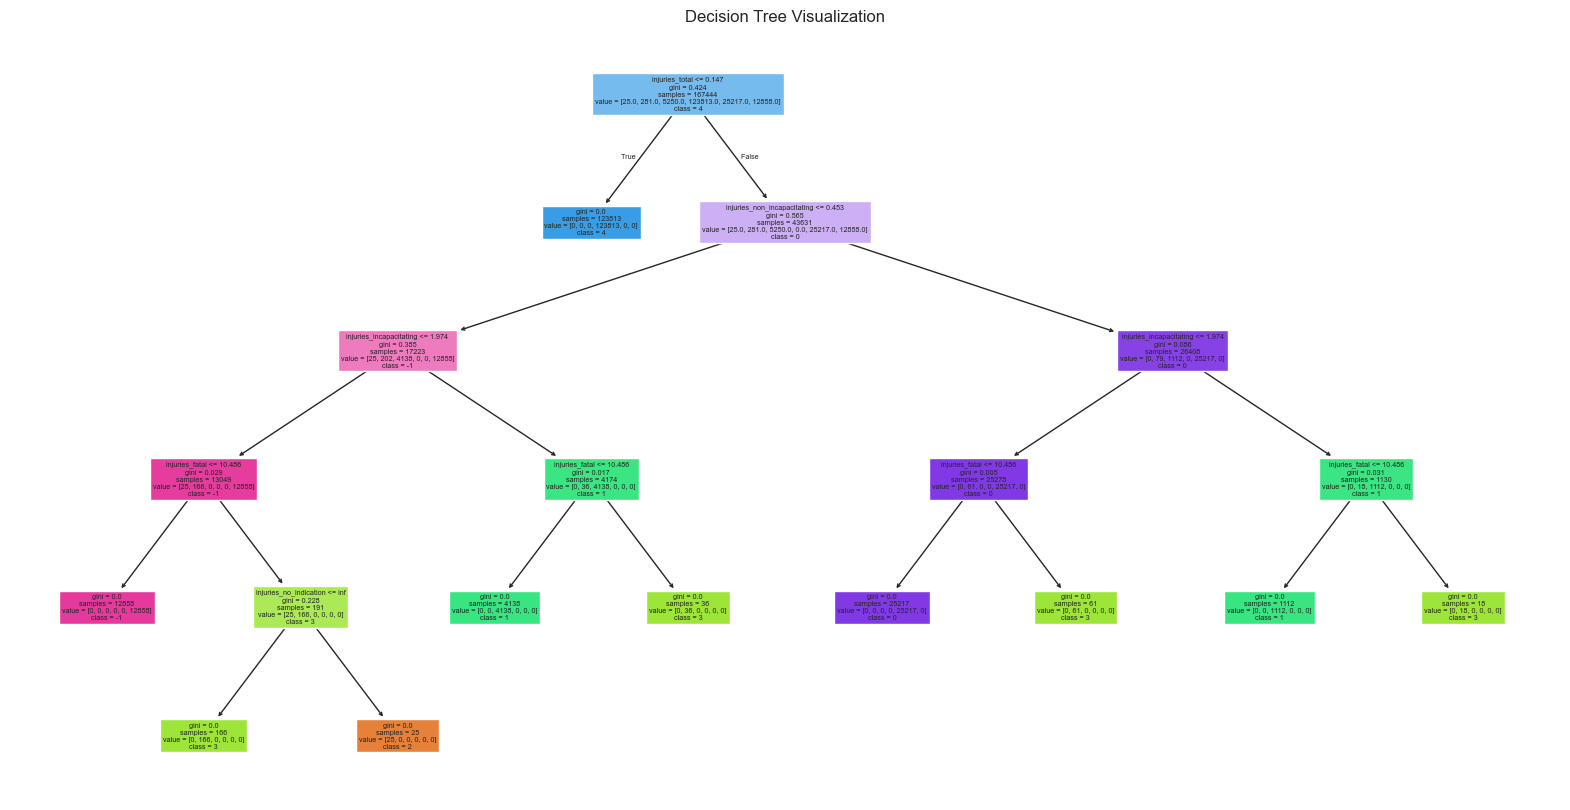

In [20]:
# Visualizing the Decision Tree
#'best_dt' is trained Decision Tree model
plt.figure(figsize=(20, 10))

# Convert y.unique() to a list of class names
class_names = [str(cls) for cls in y.unique()]

# Plot the tree
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=class_names)

plt.title("Decision Tree Visualization")
plt.show()

# Clustering Analysis and Anomaly Detection

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('Traffic_accidents_cleaned.csv')

# Create a separate copy for clustering & anomaly detection
df_clustering = df.copy()

# Selecting relevant features for clustering and anomaly detection
features = ["crash_type", "weather_condition", "trafficway_type", "most_severe_injury", "damage"]

# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_clustering[features], drop_first=True)

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Print confirmation
print("Dataframe successfully copied and preprocessed for clustering & anomaly detection.")




Dataframe successfully copied and preprocessed for clustering & anomaly detection.


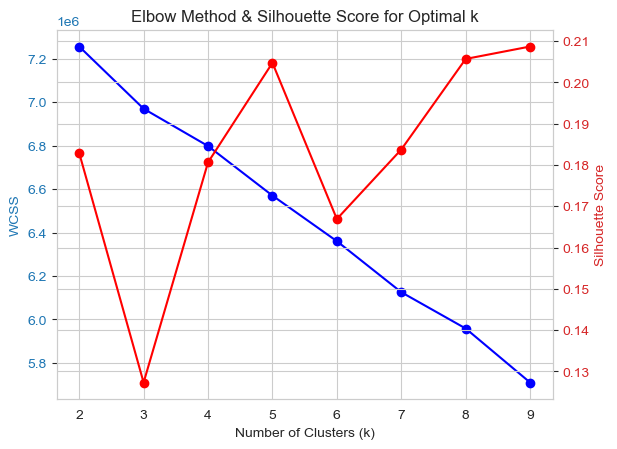

In [24]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Finding Optimal Number of Clusters for K-Means using Elbow Method
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []

for k in range(2, 10):  # Testing k values from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method and Silhouette Score
fig, ax1 = plt.subplots()

ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS', color='tab:blue')
ax1.plot(range(2, 10), wcss, 'bo-', label="Elbow Method")
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('Silhouette Score', color='tab:red')
ax2.plot(range(2, 10), silhouette_scores, 'ro-', label="Silhouette Score")
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Elbow Method & Silhouette Score for Optimal k')
plt.show()

# Choosing best k using Silhouette Score
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 since range starts from 2

# Applying K-Means Clustering with optimal k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_clustering["Cluster"] = kmeans.fit_predict(X_scaled)


In [43]:
# Applying K-Means Clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clustering["Cluster"] = kmeans.fit_predict(X_scaled)

# Anomaly Detection

# Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_clustering["Anomaly_IF"] = iso_forest.fit_predict(X_scaled)

# One-Class SVM
oc_svm = OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
df_clustering["Anomaly_SVM"] = oc_svm.fit_predict(X_scaled)

# Mapping Anomaly Labels (-1: Anomaly, 1: Normal)
df_clustering["Anomaly_IF"] = df_clustering["Anomaly_IF"].map({1: "Normal", -1: "Anomaly"})
df_clustering["Anomaly_SVM"] = df_clustering["Anomaly_SVM"].map({1: "Normal", -1: "Anomaly"})

# Save results to a CSV file for further analysis
df_clustering[["Anomaly_IF", "Anomaly_SVM"]].to_csv("Anomaly_Results.csv", index=False)
print("Results saved as 'Anomaly_Results.csv'.")

# Reduce dimensions to 2D for visualization using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Load the CSV file
results_df = pd.read_csv("Anomaly_Results.csv")

# Display the results
print(results_df.head())  # View the first few rows of the data


Results saved as 'Anomaly_Results.csv'.
  Anomaly_IF Anomaly_SVM
0     Normal     Anomaly
1     Normal      Normal
2     Normal      Normal
3     Normal      Normal
4     Normal      Normal


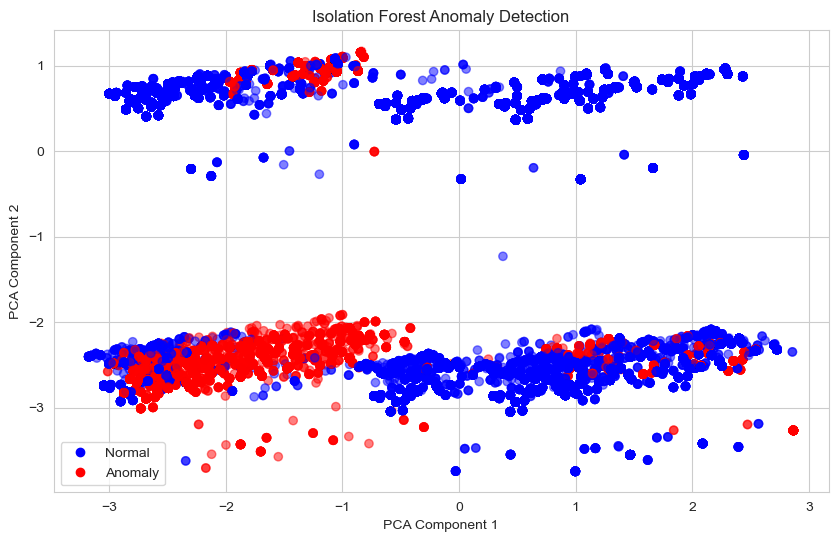

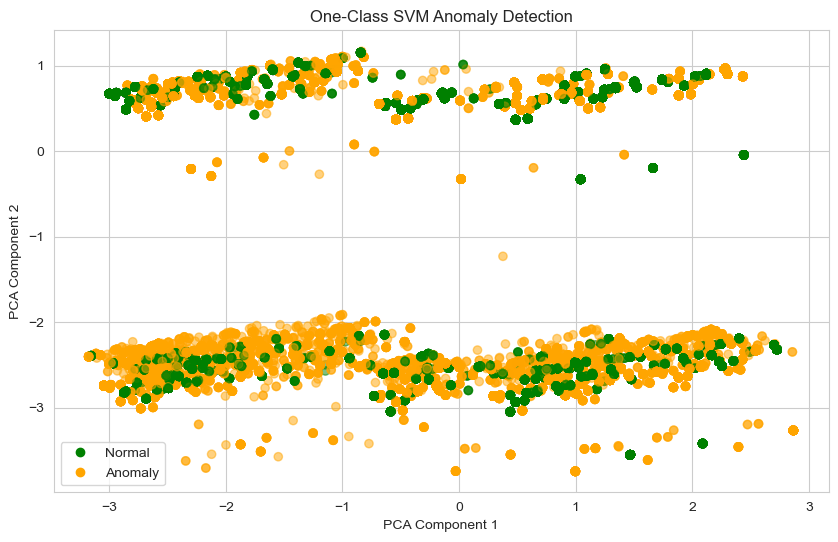

In [47]:
# Visualizing Output
import matplotlib.pyplot as plt

# Isolation Forest results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_clustering["Anomaly_IF"].map({"Normal": "blue", "Anomaly": "red"}), alpha=0.5)
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(handles=[plt.Line2D([], [], marker='o', color='blue', linestyle='None', label='Normal'),
                    plt.Line2D([], [], marker='o', color='red', linestyle='None', label='Anomaly')])
plt.show()

# One-Class SVM results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_clustering["Anomaly_SVM"].map({"Normal": "green", "Anomaly": "orange"}), alpha=0.5)
plt.title("One-Class SVM Anomaly Detection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(handles=[plt.Line2D([], [], marker='o', color='green', linestyle='None', label='Normal'),
                    plt.Line2D([], [], marker='o', color='orange', linestyle='None', label='Anomaly')])
plt.show()


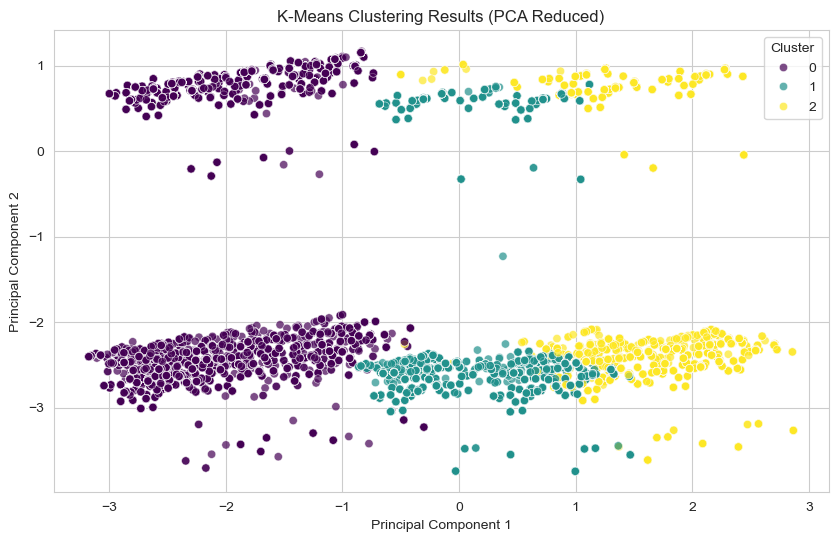

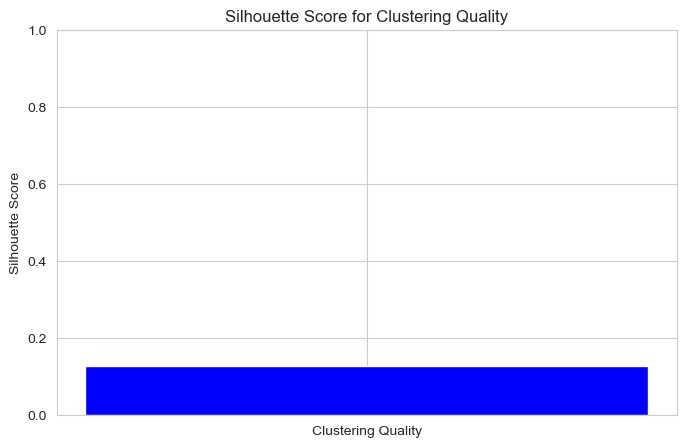

In [49]:
# Add PCA components to the dataframe
df_clustering["PCA1"] = X_pca[:, 0]
df_clustering["PCA2"] = X_pca[:, 1]

# Scatter plot for Clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clustering["PCA1"], y=df_clustering["PCA2"], hue=df_clustering["Cluster"], palette="viridis", alpha=0.7)
plt.title("K-Means Clustering Results (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Silhouette Score Plot for Cluster Quality Check
silhouette_values = silhouette_score(X_scaled, df_clustering["Cluster"])
plt.figure(figsize=(8, 5))
plt.bar(["Clustering Quality"], [silhouette_values], color='blue')
plt.title("Silhouette Score for Clustering Quality")
plt.ylabel("Silhouette Score")
plt.ylim(0, 1)
plt.show()

In [51]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
silhouette_score_value = silhouette_score(X_scaled, df_clustering["Cluster"])
print(f"Silhouette Score: {silhouette_score_value:.4f}")

# Display cluster distribution statistics
cluster_stats = df_clustering.groupby("Cluster").size().reset_index(name="Count")
print(cluster_stats)


Silhouette Score: 0.1273
   Cluster   Count
0        0   54491
1        1  105603
2        2   49181
